In [8]:
import pandas as pd

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/FULL SHUFFLED/qasper_shuffled_iris_100.csv"
df = pd.read_csv(path)

In [11]:
df

,question,context,correct_answer,iris_answer,Rouge1,Rouge2,RougeL,Bleu,Chrf,ChrfPlus,...,BEM,Bart,Prometheus,Faithfullnes,Relevancy,Correctness,RSim,Consistency,TSim,LLM
0,what language pairs are explored?,"For MultiUN corpus, we use four languages: Eng...","De-En, En-Fr, Fr-En, En-Es, Ro-En, En-De, Ar-E...","No, they do not train a different training met...",0.000000,0.0,0.0,2.627962,3.918495,3.836768,...,0.038515,0.001620,1,0.000000,0.750348,0.183591,0.734368,0.00,0.0,0.0
1,what are the topics pulled from Reddit?,Data collection. Subreddits are sub-communitie...,"training data has posts from politics, busine...","The offensive dataset is not biased by topic, ...",0.204082,0.0,0.0,1.953462,21.412523,18.921458,...,0.045437,0.006790,1,1.000000,0.736914,0.437622,0.750490,0.00,0.0,0.0
2,What accuracy does the proposed system achieve?,FLOAT SELECTED: Table 2: Main results on the D...,"F1 scores of 85.99 on the DL-PS data, 75.15 o...",Attention mechanism,0.000000,0.0,0.0,0.000000,7.675077,5.756307,...,0.052608,0.001396,1,0.750000,0.745795,0.565061,0.760242,0.75,0.0,0.0
3,What crowdsourcing platform is used?,With the purpose of obtaining evaluation datas...,"They did not use any platform, instead they h...",* For Wikipedia BIBREF4 and Twitter BIBREF8 da...,0.037037,0.0,0.0,0.189601,9.059635,7.492133,...,0.044096,0.016132,1,0.000000,0.750921,NaN,0.720634,0.00,0.0,0.0
4,On how many language pairs do they show that p...,We experimented with English INLINEFORM0 Hindi...,5,"The slot filling dataset has approximately 22,...",0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.045759,0.001966,1,0.666667,0.770895,0.188624,0.754495,0.50,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"What criteria are used to select the 8,640 Eng...",We decided to use sentences involving at least...,Sentences involving at least one race- or gend...,20 evaluators were recruited from the institution,0.000000,0.0,0.0,0.000000,15.394683,11.546012,...,0.040373,0.002582,1,NaN,0.824191,0.786709,0.746838,0.00,0.0,0.0
96,what were the baselines?,We also evaluate the Jasper model's performanc...,LF-MMI Attention\nSeq2Seq \nRNN-T \nChar E2E ...,The tweets were annotated with stance informat...,0.000000,0.0,0.0,0.000000,5.173817,3.880363,...,0.043280,0.003808,1,0.000000,0.715415,0.560422,0.741690,0.00,0.0,0.0
97,what competitive results did they obtain?,We trained a smaller Jasper 10x3 model with SG...,"In case of read speech datasets, their best m...",3,0.038462,0.0,0.0,0.000000,1.154734,0.577367,...,0.043236,0.000768,1,NaN,0.713535,0.686165,0.744659,0.00,0.0,0.0
98,By how much is performance improved with multi...,FLOAT SELECTED: Table 1: Speech Embeddings Exp...,by 2.3-6.8 points in f1 score for intent recog...,"Sure! Based on the context you provided, the a...",0.042553,0.0,0.0,0.895461,12.869351,10.014336,...,0.072984,0.003381,1,NaN,0.711888,0.484745,0.738980,0.00,0.0,0.0


In [12]:
df.columns

Index(['question', 'context', 'correct_answer', 'iris_answer', 'Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullnes', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM'],
      dtype='object')

In [13]:
columns_of_interest = ['Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullnes', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
pearson_correlation_matrix = selected_columns_df.corr()
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

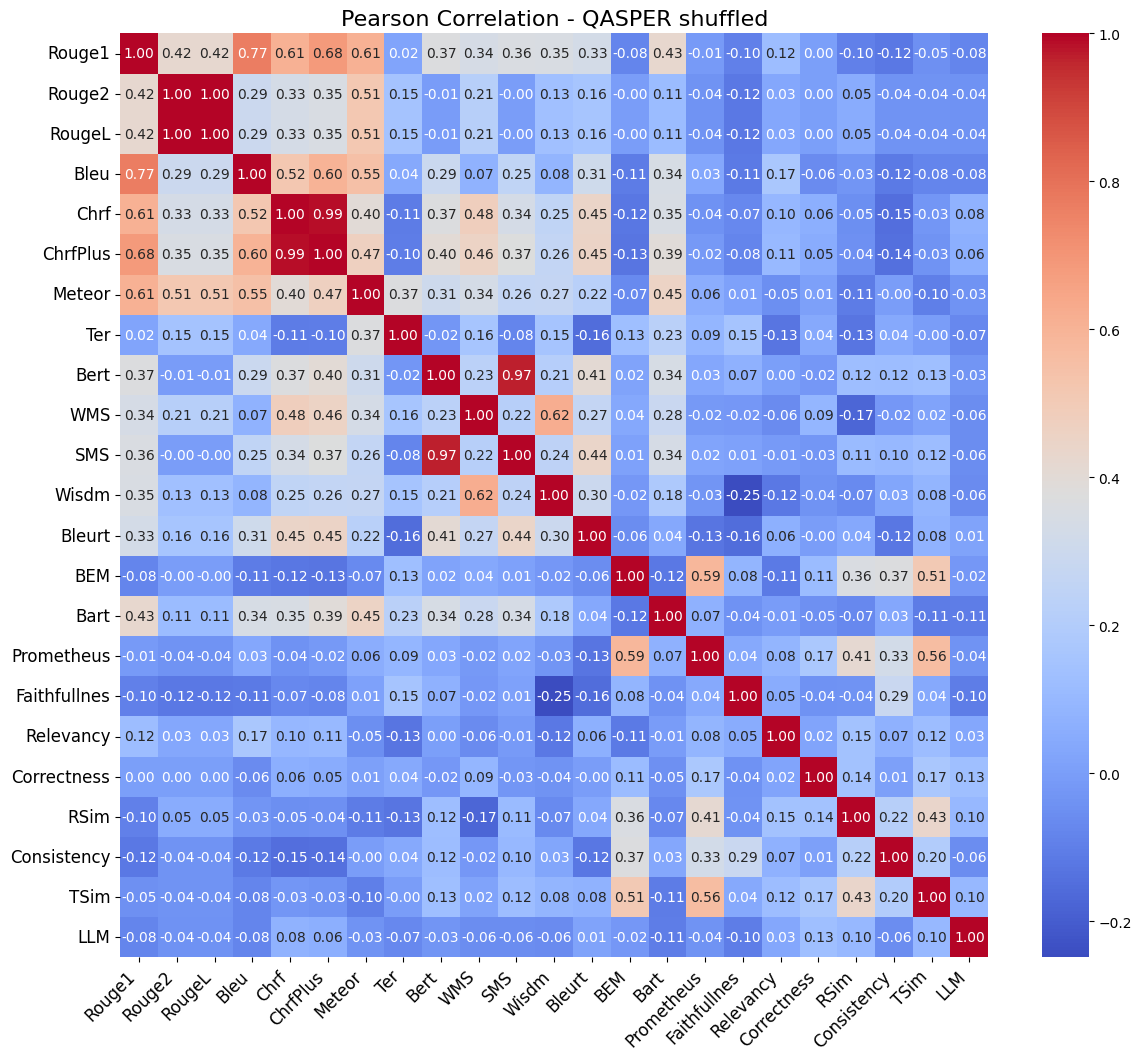

In [14]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Pearson Correlation - QASPER shuffled', fontsize=16)  # Adjust title size
plt.show()

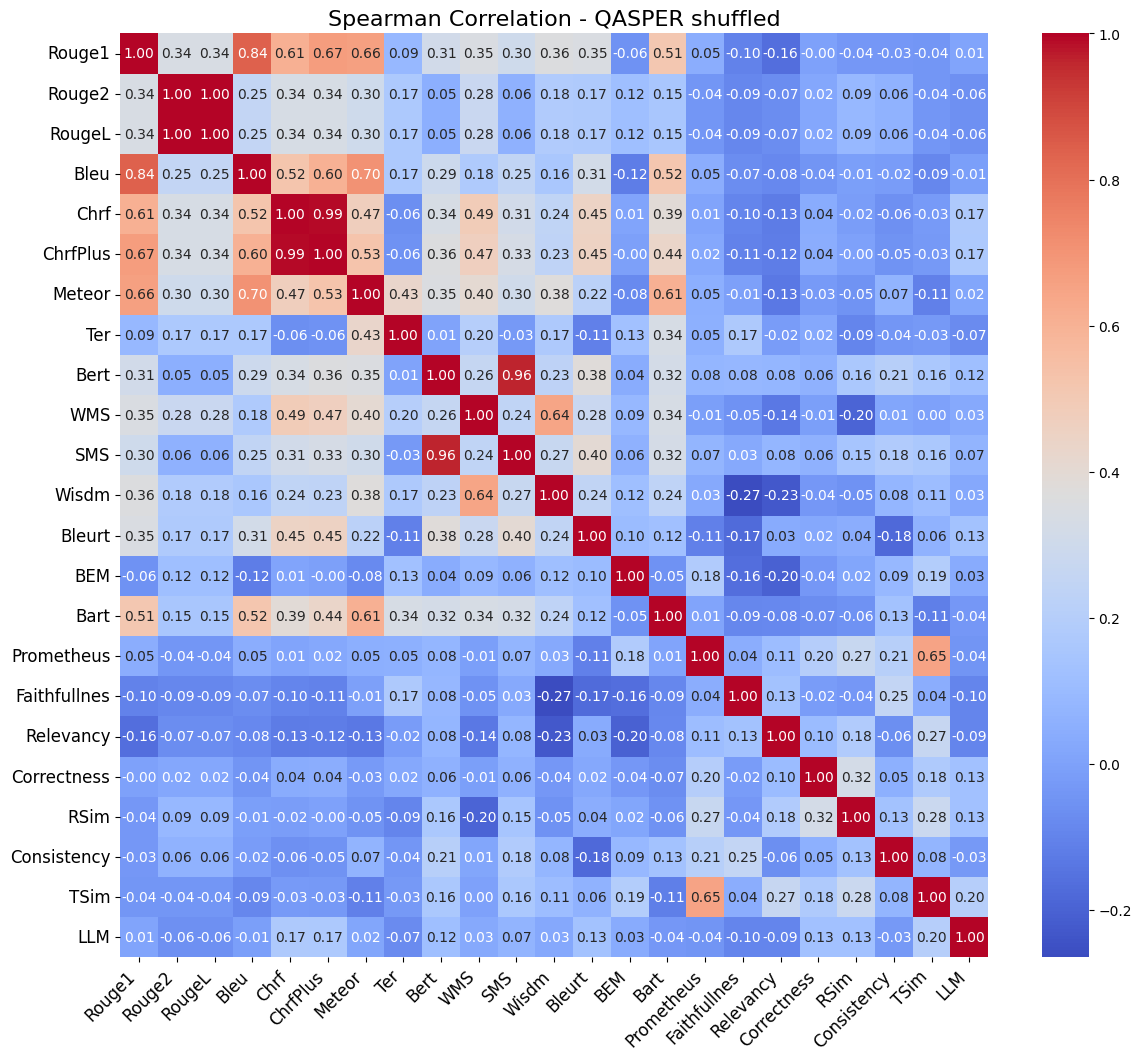

In [15]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Spearman Correlation - QASPER shuffled', fontsize=16)  # Adjust title size
plt.show()